In [1]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g16nc = Dataset('OR_ABI-L1b-RadF-M6C02_G17_s20191542000341_e20191542009408_c20191542009437.nc', 'r')
wavel2 = (g16nc.variables['band_wavelength'][0])
print(wavel2)
radiance = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None

0.64


In [3]:
# fig = plt.figure(figsize=(6,6),dpi=200)
# im = plt.imshow(radiance, cmap='Greys_r')
# cb = fig.colorbar(im, orientation='horizontal')
# cb.set_ticks([1, 100, 200, 300, 400, 500, 600])
# cb.set_label('Radiance (W m-2 sr-1 um-1)')
# plt.show()

In [4]:
# plt.savefig('OR_ABI-L1b-RadF-M6C02_G17_s20191542000341_e20191542009408_c20191542009437 ' + 'radiances- greys'+ '.png', dpi=300, facecolor='w', edgecolor='w')

In [5]:
Esun_Ch_01 = 726.721072
Esun_Ch_02 = 663.274497
Esun_Ch_03 = 441.868715
d2 = 0.3

In [6]:
# Apply the formula to convert radiance to reflectance
ref = (radiance * np.pi * d2) / Esun_Ch_02

# Make sure all data is in the valid data range
ref = np.maximum(ref, 0.0)
ref = np.minimum(ref, 1.0)

In [7]:
# Plot reflectance
fig = plt.figure(figsize=(9,9))
im = plt.imshow(ref, vmin=0.0, vmax=1.0, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Reflectance')
plt.show()


# fig,ax = plt.subplots(1,1,figsize=(9, 9))
# CS = plt.imshow(rad, cmap='jet')
# # plt.axis('off')
# cax=fig.colorbar(CS)
# ax.set_title('Band 3 Monochromatic Radiance')
# out=cax.ax.set_ylabel('Band 3 Radiance ($W\,m^{-2}\,sr^{-1}\,\mu^{-1}$)')
# out.set_verticalalignment('bottom')
# out.set_rotation(270)
# plt.savefig(file_name + 'radiances'+ '.png', dpi=300, facecolor='w', edgecolor='w')

In [8]:
# plt.savefig('OR_ABI-L1b-RadF-M6C02_G17_s20191542000341_e20191542009408_c20191542009437 ' + 'reflectances- greys'+ '.png', dpi=300, facecolor='w', edgecolor='w')

In [9]:
# Apply the formula to adjust reflectance gamma
ref_gamma = np.sqrt(ref)

In [10]:
del radiance, ref

In [11]:
# # Plot gamma adjusted reflectance
# fig = plt.figure(figsize=(6,6),dpi=200)
# im = plt.imshow(ref_gamma, vmin=0.0, vmax=1.0, cmap='Greys_r')
# # cb = fig.colorbar(im, orientation='horizontal')
# cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
# cb.set_label('Reflectance')
# plt.show()
# plt.savefig('OR_ABI-L1b-RadF-M6C02_G17_s20191542000341_e20191542009408_c20191542009437 ' + 'adjusted reflectances- greys'+ '.png', dpi=300, facecolor='w', edgecolor='w')

In [12]:
# Load Channel 1 - Blue Visible
g16nc = Dataset('OR_ABI-L1b-RadF-M6C01_G17_s20191542000341_e20191542009408_c20191542009438.nc', 'r')
radiance_1 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None
ref_1 = (radiance_1 * np.pi * d2) / Esun_Ch_01
# Make sure all data is in the valid data range
ref_1 = np.maximum(ref_1, 0.0)
ref_1 = np.minimum(ref_1, 1.0)
ref_gamma_1 = np.sqrt(ref_1)

In [13]:
# # Plot gamma adjusted reflectance channel 1
# fig = plt.figure(figsize=(6,6),dpi=200)
# im = plt.imshow(ref_gamma_1, vmin=0.0, vmax=1.0, cmap='Greys_r')
# cb = fig.colorbar(im, orientation='horizontal')
# cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
# cb.set_label('Ch01 - Reflectance')
# plt.show()

In [14]:
# Load Channel 3 - Veggie Near IR
g16nc = Dataset('OR_ABI-L1b-RadF-M6C03_G17_s20191542000341_e20191542009408_c20191542009440.nc', 'r')
radiance_3 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None
ref_3 = (radiance_3 * np.pi * d2) / Esun_Ch_03
# Make sure all data is in the valid data range
ref_3 = np.maximum(ref_3, 0.0)
ref_3 = np.minimum(ref_3, 1.0)
ref_gamma_3 = np.sqrt(ref_3)

In [15]:
# # Plot gamma adjusted reflectance channel 3
# fig = plt.figure(figsize=(6,6),dpi=200)
# im = plt.imshow(ref_gamma_3, vmin=0.0, vmax=1.0, cmap='Greys_r')
# cb = fig.colorbar(im, orientation='horizontal')
# cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
# cb.set_label('Ch03 - Reflectance')
# plt.show()

In [16]:
# Rebin function from https://stackoverflow.com/questions/8090229/resize-with-averaging-or-rebin-a-numpy-2d-array
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

In [17]:
del radiance_1,radiance_3,ref_3,ref_1

In [18]:
ref_gamma_2 = rebin(ref_gamma, [ref_gamma_3.shape[0], ref_gamma_3.shape[1]])

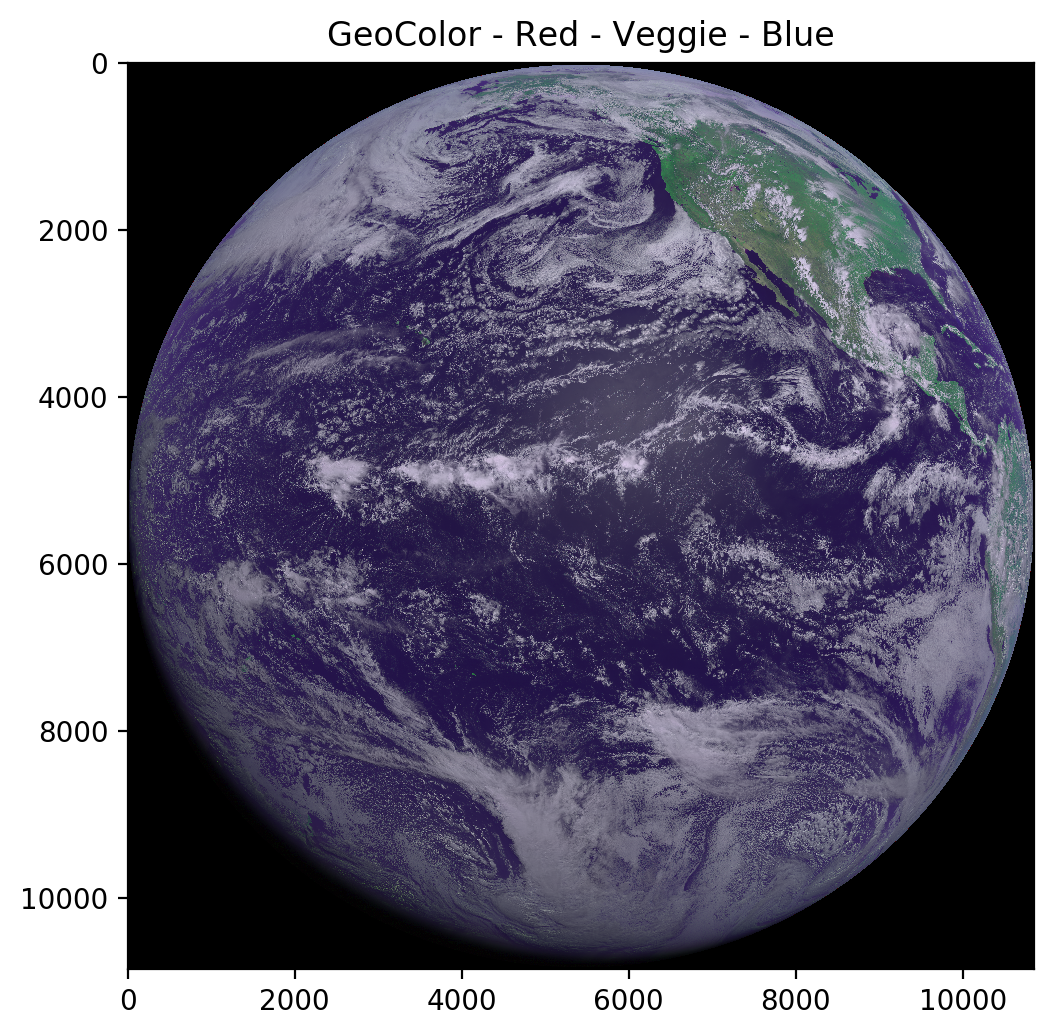

In [19]:
geocolor = np.stack([ref_gamma_2, ref_gamma_3, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(geocolor)
plt.title('GeoColor - Red - Veggie - Blue')
plt.show()

In [21]:
plt.savefig('OR_ABI-L1b-RadF-M6C02_G17_s20191542000341_e20191542009408_c20191542009437 ' + ' geocolour'+ '.png', dpi=300, facecolor='w', edgecolor='w')

<Figure size 432x288 with 0 Axes>

In [22]:
del fig, im,geocolor

In [23]:
# Derived from Planet Labs data, CC > 0.9
ref_gamma_true_green = 0.48358168 * ref_gamma_2 + 0.45706946 * ref_gamma_1 + 0.06038137 * ref_gamma_3

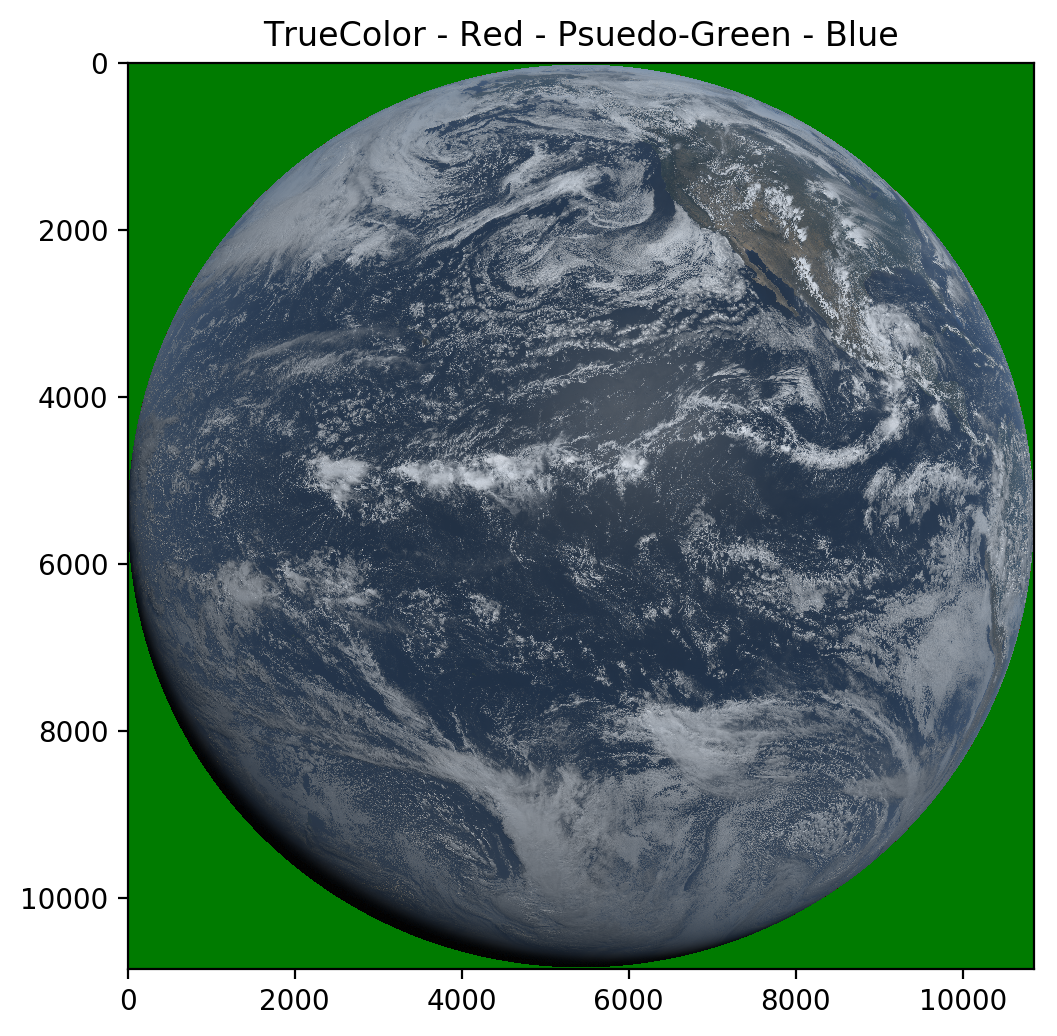

In [24]:
truecolor = np.stack([ref_gamma_2, ref_gamma_true_green, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(truecolor)
plt.title('TrueColor - Red - Psuedo-Green - Blue')
plt.show()

In [25]:
plt.savefig('OR_ABI-L1b-RadF-M6C02_G17_s20191542000341_e20191542009408_c20191542009437 ' + ' truecolour'+ '.png', dpi=300, facecolor='w', edgecolor='w')

<Figure size 432x288 with 0 Axes>